In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import scipy as sc

from simplicial_kuramoto import SimplicialComplex
from simplicial_kuramoto.graph_generator import modular_graph
from simplicial_kuramoto.integrators import *
from simplicial_kuramoto.plotting import *

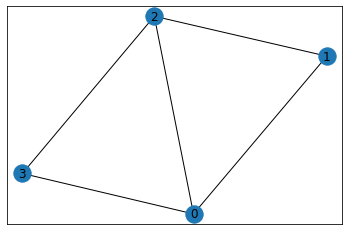

We created 2 faces


In [2]:
# construct basic cycle simplicial complex with two faces

G=nx.cycle_graph(4)
G.add_edge(0,2)
plt.figure()
nx.draw_networkx(G)
plt.show()
Cff=SimplicialComplex(graph=G)


We created 0 faces


/home/robert/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


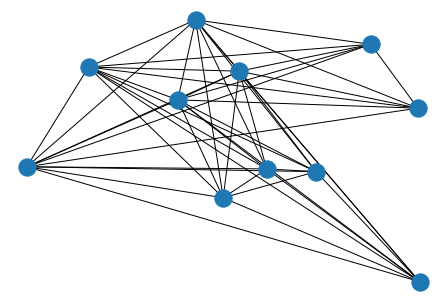

In [3]:
sim_com_original = Cff

# define number of simplices of each order
n_nodes = sim_com_original.n_nodes
n_edges = sim_com_original.n_edges
n_faces = sim_com_original.n_faces

# total nodes in supra
n_snodes = n_nodes + n_edges + n_faces
A_supra = sc.sparse.csr_matrix((n_snodes, n_snodes))
                    
# remove absolute                     
B0 = sim_com_original.node_incidence_matrix 
B1 = sim_com_original.edge_incidence_matrix

# define adjacency matrices for each order simplex
A_nodes = B0.T.dot(B0)
A_nodes.setdiag(0)
A_nodes = abs(A_nodes)

A_edges = B1.T.dot(B1)
A_edges.setdiag(0)
A_edges = abs(A_edges)

A_faces = B1.dot(B1.T)
A_faces.setdiag(0)
A_faces = abs(A_faces)

# combine into supra adjacency matrix
A_supra[:n_nodes,:n_nodes+n_edges] = sc.sparse.hstack([A_nodes,B0.T]).toarray()
A_supra[n_nodes:n_nodes+n_edges,n_nodes:n_nodes+n_edges+n_faces] = sc.sparse.hstack([A_edges,B1.T]).toarray()
A_supra[n_nodes+n_edges:,n_nodes:n_nodes+n_edges+n_faces] = sc.sparse.hstack([B1,A_faces]).toarray()

# construct networkx graph
g = nx.Graph(A_supra)
nx.draw(g)

# construct simplicial complex object to use the integrator functions without changing them
sim_com = SimplicialComplex(graph=g,faces=[])



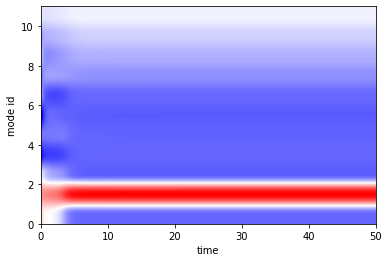

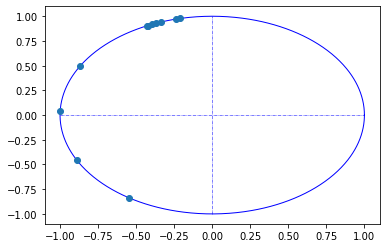

Order parameter :  0.7381591055571394


In [4]:
#np.random.seed(10)
initial_phase=2*np.pi*np.random.rand(n_nodes+n_edges+n_faces)
t_max = 50
n_t = 200

result = integrate_node_kuramoto(sim_com, initial_phase, t_max, n_t, omega_0=None)
plot_node_kuramoto(result)

plt.show()
plot_unit_circle(result.y)
op=plot_order_parameter(result.y,True,False)
print('Order parameter : ',op[-1])


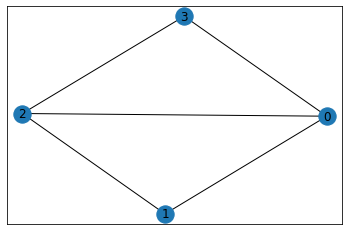

We created 1 faces


In [5]:
# construct basic cycle simplicial complex with one face

G=nx.cycle_graph(4)
G.add_edge(0,2)
plt.figure()
nx.draw_networkx(G)
plt.show()
Cfe=SimplicialComplex(graph=G,faces=[(0,1,2)]) # full empty triangles


We created 0 faces


/home/robert/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


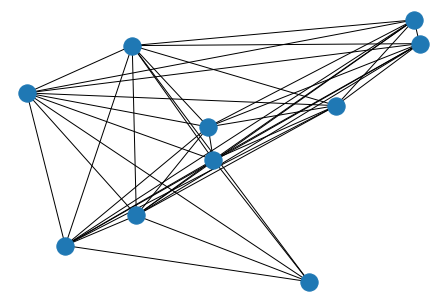

In [6]:
sim_com_original = Cfe

# define number of simplices of each order
n_nodes = sim_com_original.n_nodes
n_edges = sim_com_original.n_edges
n_faces = sim_com_original.n_faces

# total nodes in supra
n_snodes = n_nodes + n_edges + n_faces
A_supra = sc.sparse.csr_matrix((n_snodes, n_snodes))
                    
# remove absolute                     
B0 = sim_com_original.node_incidence_matrix 
B1 = sim_com_original.edge_incidence_matrix

# define adjacency matrices for each order simplex
A_nodes = B0.T.dot(B0)
A_nodes.setdiag(0)
A_nodes = abs(A_nodes)

A_edges = B1.T.dot(B1)
A_edges.setdiag(0)
A_edges = abs(A_edges)

A_faces = B1.dot(B1.T)
A_faces.setdiag(0)
A_faces = abs(A_faces)

# combine into supra adjacency matrix
A_supra[:n_nodes,:n_nodes+n_edges] = sc.sparse.hstack([A_nodes,B0.T]).toarray()
A_supra[n_nodes:n_nodes+n_edges,n_nodes:n_nodes+n_edges+n_faces] = sc.sparse.hstack([A_edges,B1.T]).toarray()
A_supra[n_nodes+n_edges:,n_nodes:n_nodes+n_edges+n_faces] = sc.sparse.hstack([B1,A_faces]).toarray()

# construct networkx graph
g = nx.Graph(A_supra)
nx.draw(g)

# construct simplicial complex object to use the integrator functions without changing them
sim_com = SimplicialComplex(graph=g,faces=[])



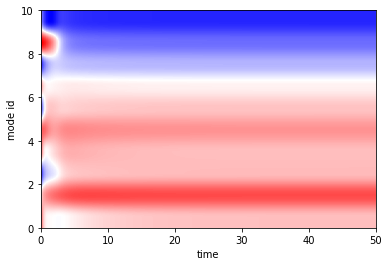

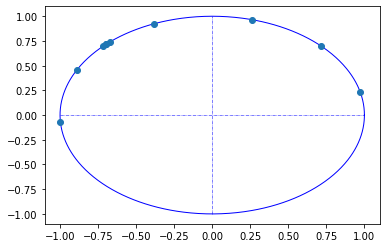

Order parameter :  0.6824508832716176


In [7]:
#np.random.seed(10)
initial_phase=2*np.pi*np.random.rand(n_nodes+n_edges+n_faces)
t_max = 50
n_t = 200

result = integrate_node_kuramoto(sim_com, initial_phase, t_max, n_t, omega_0=None)
plot_node_kuramoto(result)

plt.show()
plot_unit_circle(result.y)
op=plot_order_parameter(result.y,True,False)
print('Order parameter : ',op[-1])


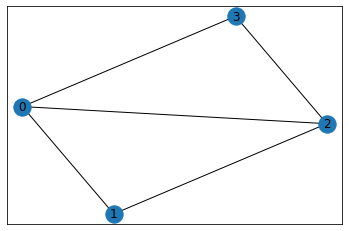

We created 0 faces


In [8]:
# construct basic cycle simplicial complex with one face

G=nx.cycle_graph(4)
G.add_edge(0,2)
plt.figure()
nx.draw_networkx(G)
plt.show()
Cee=SimplicialComplex(graph=G,faces=[]) # full empty triangles


We created 0 faces


/home/robert/anaconda3/lib/python3.7/site-packages/scipy/sparse/_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


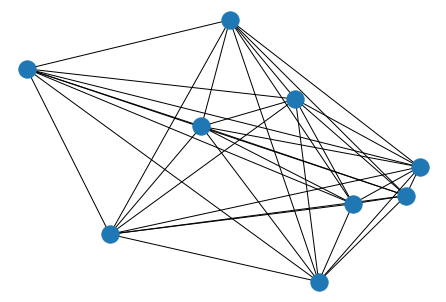

In [9]:
sim_com_original = Cee

# define number of simplices of each order
n_nodes = sim_com_original.n_nodes
n_edges = sim_com_original.n_edges
n_faces = sim_com_original.n_faces

# total nodes in supra
n_snodes = n_nodes + n_edges + n_faces
A_supra = sc.sparse.csr_matrix((n_snodes, n_snodes))
                    
# remove absolute                     
B0 = sim_com_original.node_incidence_matrix 
B1 = sim_com_original.edge_incidence_matrix

# define adjacency matrices for each order simplex
A_nodes = B0.T.dot(B0)
A_nodes.setdiag(0)
A_nodes = abs(A_nodes)

A_edges = B1.T.dot(B1)
A_edges.setdiag(0)
A_edges = abs(A_edges)

A_faces = B1.dot(B1.T)
A_faces.setdiag(0)
A_faces = abs(A_faces)

# combine into supra adjacency matrix
A_supra[:n_nodes,:n_nodes+n_edges] = sc.sparse.hstack([A_nodes,B0.T]).toarray()
A_supra[n_nodes:n_nodes+n_edges,n_nodes:n_nodes+n_edges+n_faces] = sc.sparse.hstack([A_edges,B1.T]).toarray()
A_supra[n_nodes+n_edges:,n_nodes:n_nodes+n_edges+n_faces] = sc.sparse.hstack([B1,A_faces]).toarray()

# construct networkx graph
g = nx.Graph(A_supra)
nx.draw(g)

# construct simplicial complex object to use the integrator functions without changing them
sim_com = SimplicialComplex(graph=g,faces=[])



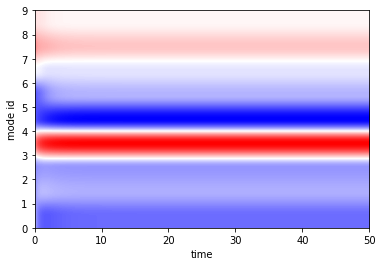

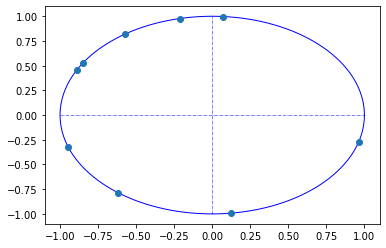

Order parameter :  0.361693625611085


In [10]:
#np.random.seed(10)
initial_phase=2*np.pi*np.random.rand(n_nodes+n_edges+n_faces)
t_max = 50
n_t = 200

result = integrate_node_kuramoto(sim_com, initial_phase, t_max, n_t, omega_0=None)
plot_node_kuramoto(result)

plt.show()
plot_unit_circle(result.y)
op=plot_order_parameter(result.y,True,False)
print('Order parameter : ',op[-1])
